In [25]:
import itertools
import numpy
from Bio import SeqIO
from Bio.Seq import Seq
import seaborn as sns
import matplotlib.pyplot as plt

In [688]:
WINDOW=10
def build_matrix(seq1: Seq, seq2: Seq, max_window: int = WINDOW, min_window=1):
    """
    Primeira sequência é a coluna e segunda é a linha.
    Retorna a soma de todas as janelas em 2 dimensões, na normal e na reversa.

    :rtype: numpy array (len segunda, len primeira, 2)
    """
    len2 = len(seq2)
    len1 = len(seq1)
    seq1 = str(seq1.upper())
    seq2_reverse = str(seq2.upper().reverse_complement())
    seq2_invert = str(seq2.upper())[::-1]
    seq2 = str(seq2.upper())
    rows = numpy.zeros((len2, len1, 3))

    for w in range(min_window, max_window+1):
        for b in range(0, len2-w+1):
            for r in range(0, len1-w+1):
                if seq1[r:r+w] == seq2[b:b+w]:
                    numpy.fill_diagonal(rows[b:b+w, r:r+w, 0], w)
                if seq1[r:r+w] == seq2_reverse[b:b+w]:
                    numpy.fill_diagonal(rows[:, ::-1][b:b+w, r:r+w, 1], w)
                if seq1[r:r+w] == seq2_invert[b:b+w]:
                    numpy.fill_diagonal(rows[:, ::-1][b:b+w, r:r+w, 2], w)

    return rows

In [689]:
s2.reverse_complement()

Seq('CTGA')

In [706]:
m = build_matrix(Seq("AGTC"), Seq("CTGA"))
m.T[2]

array([[0., 0., 0., 4.],
       [0., 0., 4., 0.],
       [0., 4., 0., 0.],
       [4., 0., 0., 0.]])

In [690]:
def print_matrices(matrices, names, index=0):
    fig = plt.figure(figsize = (20,20)) # width x height
    size = len(matrices)
    side = int(size**0.5)
    cmap = sns.color_palette("Blues", as_cmap=True)
    for i in range(size):
        m = matrices[i][:,:,index]
        l = i//side
        ax = fig.add_subplot(side, side, i+1, title=f"{names[i][0]}x{names[i][1]}")
        sns.heatmap(data=m, ax=ax, cmap=cmap, xticklabels=False, yticklabels=False, cbar=False)

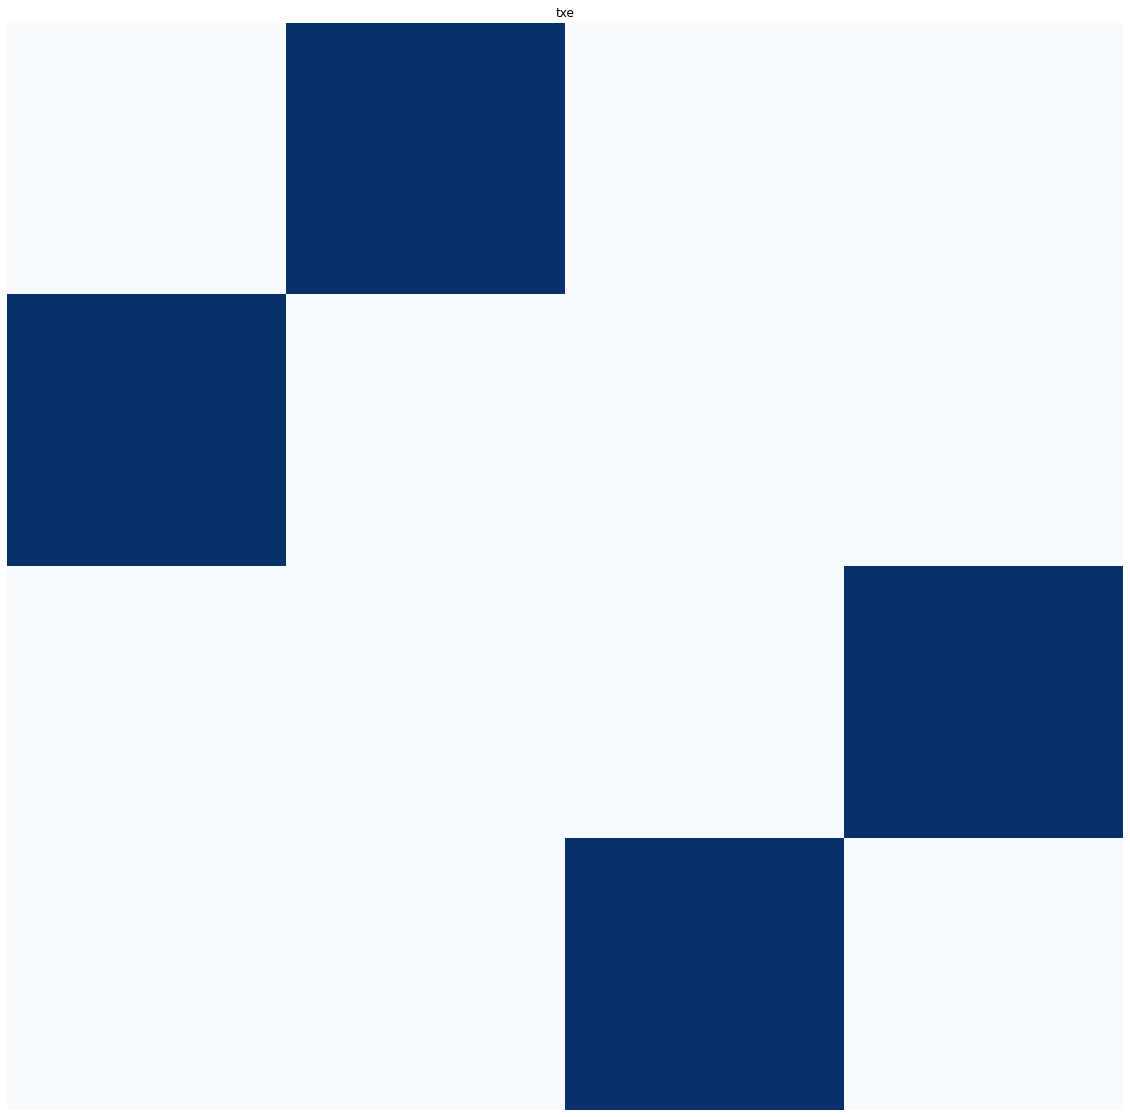

In [691]:
print_matrices([m], ["testing_reverse"], 1)

In [696]:
matrices = list()
names = list()
with open("data/flexidot.fasta") as handle:
    sequences = SeqIO.parse(handle, "fasta")
    for record in itertools.product(sequences, repeat=2):
        matrices.append(build_matrix(record[0], record[1], 10))
        names.append((record[0].id, record[1].id))


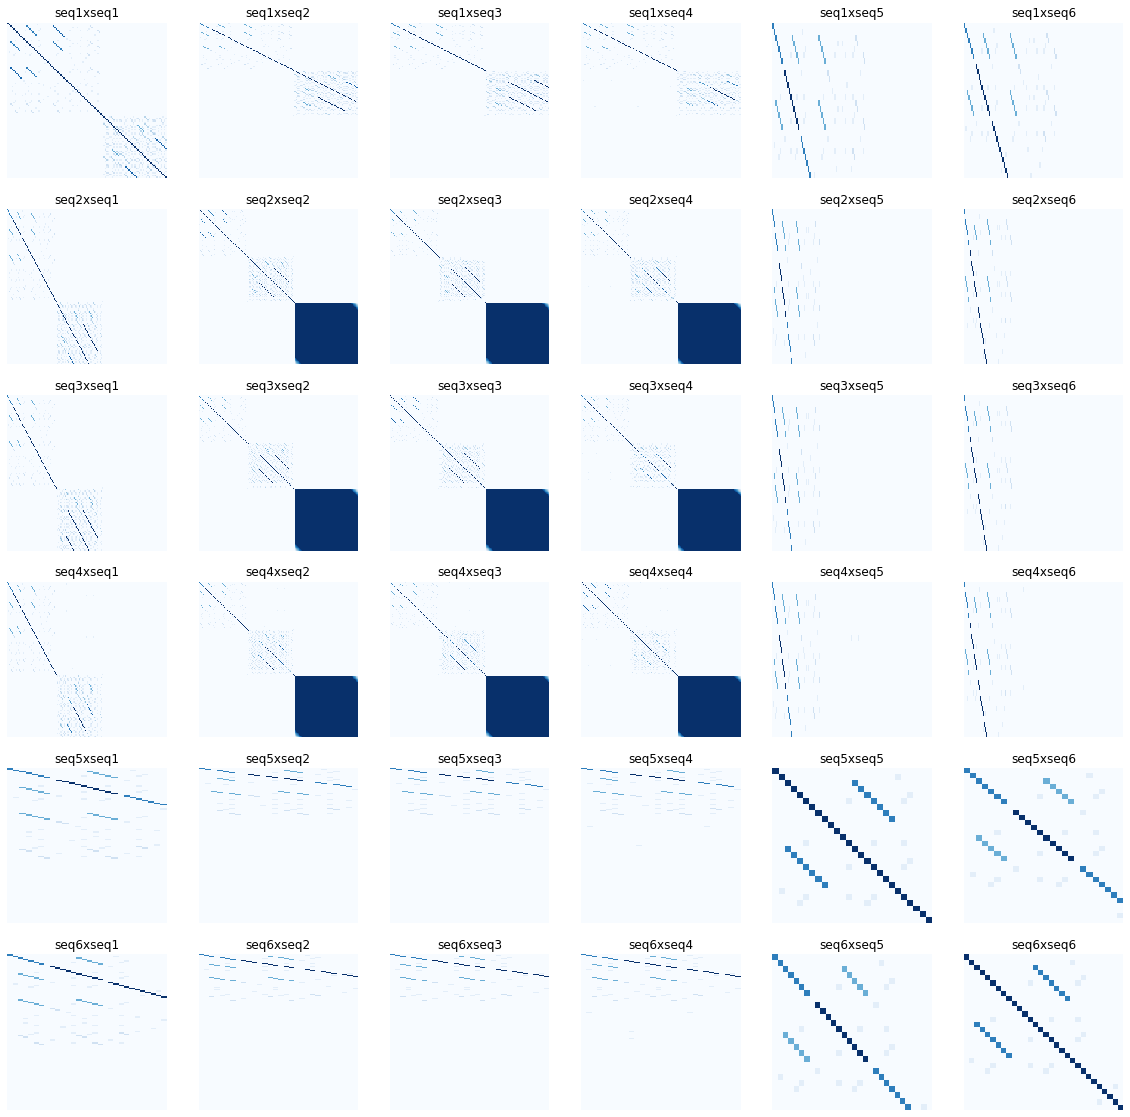

In [697]:
print_matrices(matrices, names)

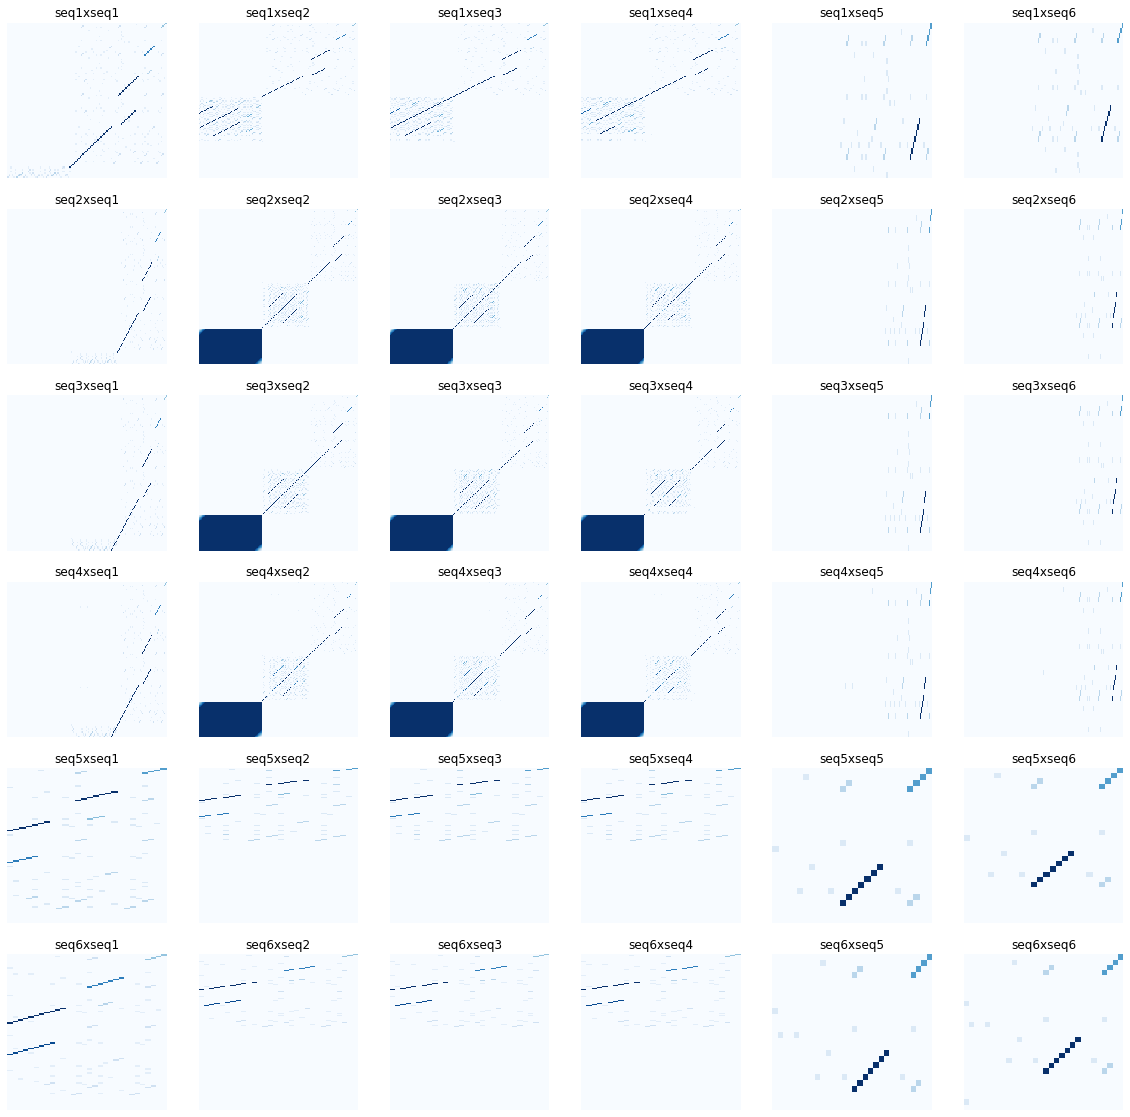

In [698]:
print_matrices(matrices, names, 1)

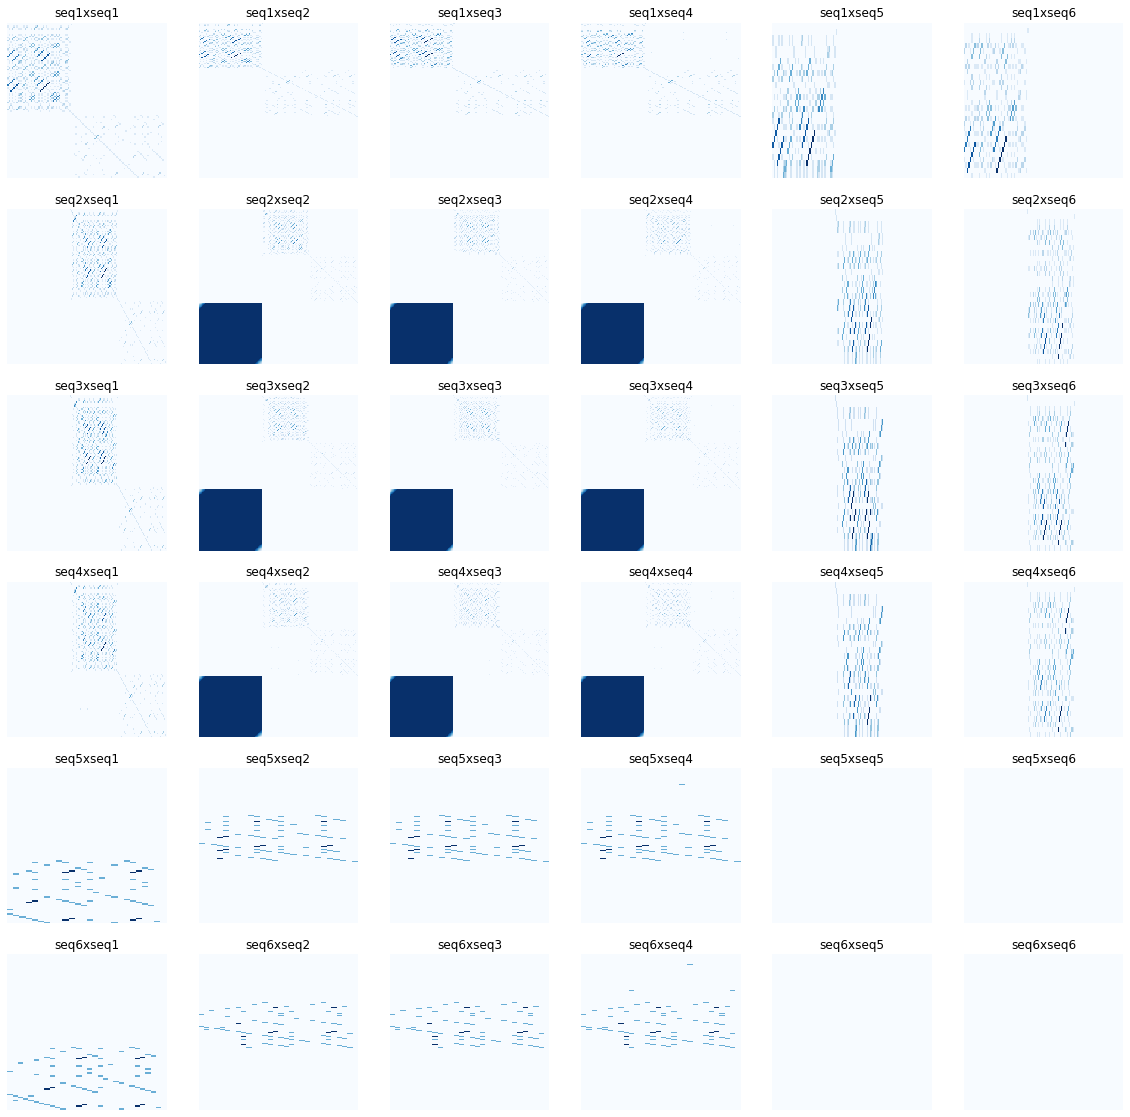

In [699]:
print_matrices(matrices, names, 2)